In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
import os 
from glob import glob
import random
import numpy as np

In [3]:
os.listdir("cropped_dataset/train")

['1', '2', '.ipynb_checkpoints', '0']

In [4]:
train_dir = "cropped_dataset/train" 
test_dir = "cropped_dataset/test"

# fit 데이터셋 만들기

In [5]:
train_path = glob(train_dir+"/*/*.jpg")
test_path = glob(test_dir+"/*/*.jpg")

In [6]:

random.seed(0)
random.shuffle(train_path)
random.shuffle(test_path)
print(train_path[0])
print(test_path[0])

cropped_dataset/train/1/aug_3_0_4612.jpg
cropped_dataset/test/0/aug_1_2_0_3803.jpg


In [7]:
def get_label(filepath):
    return filepath.split("/")[-2]

In [8]:
train_x = []
for file in train_path:
    gfile = tf.io.read_file(file)
    image = tf.io.decode_image(gfile)
    image = tf.image.resize(image, [50, 50])
    image = tf.image.rgb_to_grayscale(image)
    train_x.append(np.asarray(image))

In [9]:
train_y = [get_label(file) for file in train_path]

In [10]:
test_x = []
for file in test_path:
    gfile = tf.io.read_file(file)
    image = tf.io.decode_image(gfile)
    image = tf.image.resize(image, [50, 50])
    image = tf.image.rgb_to_grayscale(image)
    test_x.append(np.asarray(image))

In [11]:
test_y = [get_label(file) for file in test_path]

In [12]:
train_x[10].shape

(50, 50, 1)

In [13]:
type(train_x[0].shape)
print(type(np.array(train_x[0])))

<class 'numpy.ndarray'>


In [14]:
len(train_y)

13395

In [15]:
np.unique(train_y, return_counts=True)

(array(['0', '1', '2'], dtype='<U1'), array([4478, 4419, 4498]))

In [16]:
np.unique(test_y, return_counts=True)

(array(['0', '1', '2'], dtype='<U1'), array([496, 489, 498]))

In [17]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)

In [18]:
train_x = train_x/255
test_x = test_x/255

In [19]:
train_x.shape

(13395, 50, 50, 1)

In [20]:
test_x.shape

(1483, 50, 50, 1)

In [21]:
train_y = train_y.astype("int32")
test_y = test_y.astype("int32")

In [22]:
#train_y = to_categorical(train_y, 3)
#test_y = to_categorical(test_y, 3)

# 모델 정의

In [23]:
input_shape = (50,50,1)
batch_size = 32

learning_rate = 0.0001
# 0.01로 학습했는데 학습 안됨.

dropout_rate = 0.4
num_classes=3
num_epochs=100

In [24]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10
)

In [25]:
class ConvNet(tf.keras.Model):
    def __init__(self):
        super(ConvNet, self).__init__()
        conv2d = tf.keras.layers.Conv2D
        maxpool = tf.keras.layers.MaxPool2D
        self.sequence = list()
        self.sequence.append(conv2d(16, (3,3), padding="same", activation='relu' ))
        self.sequence.append(conv2d(16, (3,3), padding="same", activation='relu' ))
        self.sequence.append(maxpool(2,2))
        self.sequence.append(conv2d(32, (3,3), padding="same", activation='relu' ))
        self.sequence.append(conv2d(32, (3,3), padding="same", activation='relu' ))
        self.sequence.append(maxpool(2,2))
        self.sequence.append(conv2d(64, (3,3), padding="same", activation='relu' ))
        self.sequence.append(conv2d(64, (3,3), padding="same", activation='relu' ))
        self.sequence.append(tf.keras.layers.Flatten())
        self.sequence.append(tf.keras.layers.Dense(128, activation="relu"))
        self.sequence.append(tf.keras.layers.Dense(3, activation="softmax"))
        
        
        
    def call(self, x, training=False, mask=None):
        for layer in self.sequence:
            x = layer(x)
        
        return x

In [26]:
model = ConvNet()

In [27]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [28]:
hist = model.fit(
    train_x, train_y,
    validation_data=(test_x, test_y),
    epochs=num_epochs,
    batch_size=batch_size,
    callbacks=[early_stopping]
)

Train on 13395 samples, validate on 1483 samples
Epoch 1/100
13395/13395 [==============================] - 24s 2ms/sample - loss: 0.5849 - accuracy: 0.7426 - val_loss: 0.3595 - val_accuracy: 0.8469
Epoch 2/100
13395/13395 [==============================] - 20s 2ms/sample - loss: 0.3352 - accuracy: 0.8587 - val_loss: 0.3085 - val_accuracy: 0.8786
Epoch 3/100
13395/13395 [==============================] - 20s 1ms/sample - loss: 0.2727 - accuracy: 0.8940 - val_loss: 0.2589 - val_accuracy: 0.8989
Epoch 4/100
13395/13395 [==============================] - 22s 2ms/sample - loss: 0.2241 - accuracy: 0.9135 - val_loss: 0.2237 - val_accuracy: 0.9137
Epoch 5/100
13395/13395 [==============================] - 21s 2ms/sample - loss: 0.1924 - accuracy: 0.9252 - val_loss: 0.2362 - val_accuracy: 0.9083
Epoch 6/100
13395/13395 [==============================] - 20s 1ms/sample - loss: 0.1593 - accuracy: 0.9429 - val_loss: 0.1894 - val_accuracy: 0.9265
Epoch 7/100
13395/13395 [==========================

# 학습 과정 그래프

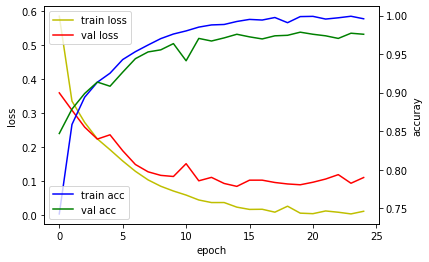

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 모델 저장

In [30]:
#model.save("model/", include_optimizer=True, save_format='tf')
model.save('my_model.h5')

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.